In [218]:
import numpy as np
import pandas as pd
from math import log
import re
import sys
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet as wn

In [219]:
train = pd.read_csv("traindata.csv").values
test = pd.read_csv("testdata.csv").values
positive_dataset = train[np.where((train[:,-1] == 'positive'))]
negative_dataset = train[np.where((train[:,-1] == 'negative'))]
train[:,1] = (train[:,1]=='positive').astype(int)

In [220]:
stop_words = set(stopwords.words('english')) 
ps = PorterStemmer()
def process_message(m):
    m = m.lower()
    m = m.replace('\'ll','')
    m = m.replace('\'s','')
    regex = re.compile('[^a-z\s]')
    m = regex.sub('', m)
    m = m.split(" ")
    ans = []
    for i in m:
        if i not in stop_words:
            ans.append(ps.stem(i))
    return ans

In [203]:
ps.stem("Puzzle")

'puzzl'

In [197]:
count_pos = dict()
count_neg = dict()
prob_pos = dict()
prob_neg = dict()
num_feed = train.shape[0]
pos_feed, neg_feed = train[:,1].sum(),num_feed-train[:,1].sum()
prob_neg_feed, prob_pos_feed = neg_feed/num_feed, pos_feed/num_feed
neg_words = 0
pos_words = 0
count_pos_bi = dict()
count_neg_bi = dict()
prob_pos_bi = dict()
prob_neg_bi = dict()
neg_bi = 0
pos_bi = 0
for i in range(num_feed):
    message_processed = process_message(train[i,0])
    for word in message_processed:
        if train[i,1]:
            count_pos[word] = count_pos.get(word, 0) + 1
            pos_words += 1
        else:
            count_neg[word] = count_neg.get(word, 0) + 1
            neg_words += 1
            
# for i in range(num_feed):
#     message_processed = process_message(train[i,0])
#     for i in range(len(message_processed)-1):
#         bi = (message_processed[i],message_processed[i+1]) 
#         if train[i,1]:
#             count_pos_bi[bi] = count_pos_bi.get(bi, 0) + 1
#             pos_bi += 1
#         else:
#             count_neg_bi[bi] = count_neg_bi.get(bi, 0) + 1
#             neg_bi += 1
            
pos_denom = (pos_words+len(list(count_pos.keys())))
neg_denom = (neg_words+len(list(count_neg.keys())))
for word in count_pos:
    prob_pos[word] = ((count_pos.get(word,0)+1)/pos_denom)
for word in count_neg:
    prob_neg[word] = ((count_neg.get(word,0)+1)/neg_denom)
    
# pos_denom_bi = (pos_bi+len(list(count_pos_bi.keys())))
# neg_denom_bi = (neg_bi+len(list(count_neg_bi.keys())))
# for word in count_pos_bi:
#     prob_pos[word] = ((count_pos_bi.get(word,0)+1)/pos_denom_bi)
# for word in count_neg_bi:
#     prob_neg[word] = ((count_neg_bi.get(word,0)+1)/neg_denom_bi)

In [198]:
def classify(processed_message):
    p_pos, p_neg = 0, 0
    for word in processed_message:
        p_pos += log(prob_pos.get(word,1/pos_denom))
        p_neg += log(prob_neg.get(word,1/neg_denom))
#     for i in range(len(message_processed)-1):
#         p_pos += log(prob_pos_bi.get((message_processed[i],message_processed[i+1]),1/pos_denom_bi))
#         p_neg += log(prob_neg_bi.get((message_processed[i],message_processed[i+1]),1/neg_denom_bi))
    p_pos += log(prob_pos_feed)
    p_neg += log(prob_neg_feed)
    return p_pos >= p_neg

def predict(testData):
    result = []
    for i in range(testData.shape[0]):
        processed_message = process_message(testData[i,0])
        result.append(int(classify(processed_message)))
    return result

In [199]:
pred = predict(train)

In [200]:
accu = (train[:,1]==pred).astype(int).sum()/train.shape[0]*100

In [201]:
print("Accuracy on training set %.2f" % accu,"%")

Accuracy on training set 94.82 %


In [221]:
pos_words = ' '
for i in positive_dataset:
    m = i[0]
    m = m.lower()
    m = m.replace('\'ll','')
    m = m.replace('\'s','')
    regex = re.compile('[^a-z\s]')
    m = regex.sub('', m)
    m = m.split(" ")
    for j in m:
        if j not in stop_words:
            pos_words += j + ' '
    

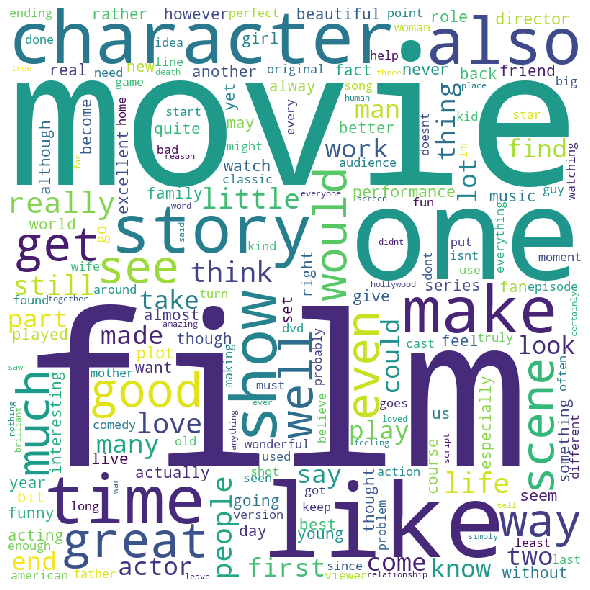

In [226]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(pos_words) 

# plot the WordCloud 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [224]:
neg_words = ' '
for i in negative_dataset:
    m = i[0]
    m = m.lower()
    m = m.replace('\'ll','')
    m = m.replace('\'s','')
    regex = re.compile('[^a-z\s]')
    m = regex.sub('', m)
    m = m.split(" ")
    for j in m:
        if j not in stop_words:
            neg_words += j + ' '
    

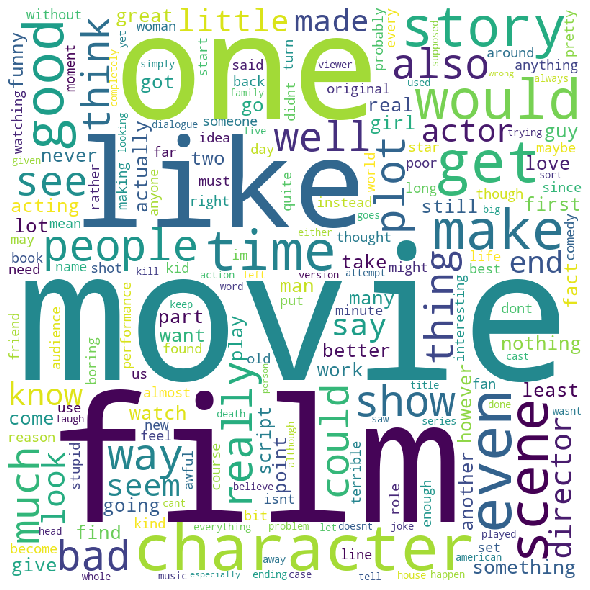

In [227]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(neg_words) 

# plot the WordCloud 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 
